In [26]:
import pandas as pd


breast = pd.read_csv("data.csv")

In [27]:
breast.shape

(569, 33)

# 2. Data Preprocessing

In [28]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [29]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

# Encoding the Target Variable

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

# Splitting Data into Training and Testing Sets

In [32]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

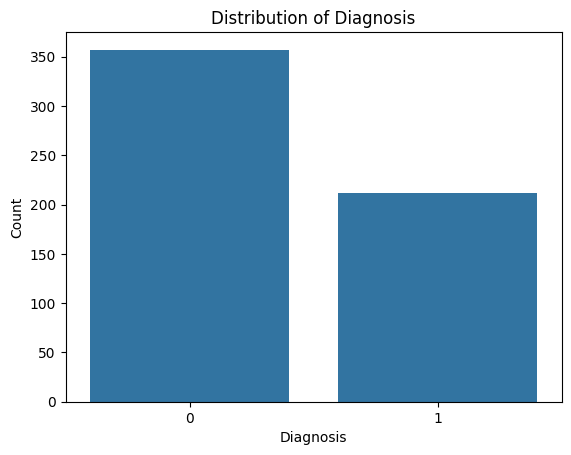

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x=breast['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [35]:
# Visualize the correlation matrix
breast.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


# Training Model

In [36]:
# for now we have used logistic regression (you can try more models)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the performance on the testing set
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy:', accuracy_lr)

Accuracy: 0.9736842105263158


In [37]:
# -0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
#         1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
#         2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
#        -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
#         0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
#         1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
#         3.15970842
        
        
        
        
        
#   -0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
#        -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
#         0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
#         0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
#         0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
#        -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
#         0.49035329      

# Prediction System

In [62]:
import numpy as np

input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
        3.15970842)
np_df = np.asarray(input_text)
pred = lr.predict(np_df.reshape(1,-1))
if pred[0] == 1:
    print("Cancrous")
else:
    print("Not Cancrous")

Cancrous


# Save Model 

In [63]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

In [64]:
import sklearn

print(sklearn.__version__)  # use the same version in deployment as well (pycharm)

1.7.2


In [65]:
breast.duplicated().sum()

0

In [66]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                0 non-null      float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [67]:
# compute correlation only for numeric columns to avoid non-numeric columns like 'diagnosis'
num_corr = breast.select_dtypes(include=[np.number]).corr()
num_corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,NaN,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,0.074626,NaN,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,NaN,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,NaN,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,NaN,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,NaN,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,NaN,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,NaN,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,NaN,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [49]:
# breast.drop('Unnamed: 32', axis=1, inplace=True)

In [45]:
breast.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Encoding the Target Variable

In [46]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

In [50]:
breast['diagnosis'] = breast['diagnosis'].map({'M':1,'B':0})

In [68]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,NaN,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,NaN,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,NaN,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,NaN,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,NaN,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,NaN,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
breast['diagnosis'].value_counts()

Series([], Name: count, dtype: int64)

## Splitting the data into training and test sets

In [55]:
breast.shape

(569, 32)

In [ ]:
# # install missing packages in the notebook environment (use when ModuleNotFoundError occurs)
# %pip install scikit-learn
# %pip install seaborn

# # imports (placed at top of the cell)
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# X=breast.drop('diagnosis', axis=1)
# y=breast.diagnosis

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

# # increase max_iter to avoid convergence warnings for some datasets
# model=LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# y_pred=model.predict(X_test)
# print('Accuracy:', accuracy_score(y_test, y_pred))

# cm=confusion_matrix(y_test, y_pred)
# print('Confusion matrix:\n', cm)
# sns.heatmap(cm, annot=True, fmt='d')
# plt.show()


In [56]:
# Ensure pandas is available (in case this cell runs before the cell that imported it)
if 'pd' not in globals():
	import pandas as pd

# Ensure 'breast' dataframe exists (load from CSV if necessary)
if 'breast' not in globals():
	try:
		breast = pd.read_csv('data.csv')
	except FileNotFoundError as e:
		raise FileNotFoundError("Could not find 'data.csv'. Make sure the file is in the notebook working directory.") from e

# Ensure X and y exist (they are defined in another cell). If the cell that creates them
# wasn't executed, define them here from the 'breast' dataframe to avoid NameError.
if 'X' not in globals():
	X = breast.drop('diagnosis', axis=1)
if 'y' not in globals():
	y = breast['diagnosis']

# ensure train_test_split is available
if 'train_test_split' not in globals():
	from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# .shape is an attribute (a tuple), not a method — do not call it
X_train.shape

(455, 31)

In [58]:
X_test.shape

(114, 31)

## Feature Training

In [59]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
sc.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [ ]:
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
X_train

array([[-0.23712699, -1.44075296, -0.43531947, ...,  2.09724217,
         1.88645014,         nan],
       [-0.23702031,  1.97409619,  1.73302577, ...,  1.89116053,
         2.49783848,         nan],
       [-0.23712907, -1.39998202, -1.24962228, ...,  0.59760192,
         0.0578942 ,         nan],
       ...,
       [-0.17630431,  0.04880192, -0.55500086, ..., -0.70863864,
        -1.27145475,         nan],
       [-0.23675669, -0.03896885,  0.10207345, ...,  0.43432185,
         1.21336207,         nan],
       [-0.2371006 , -0.54860557,  0.31327591, ..., -0.3345212 ,
        -0.84628745,         nan]])

## Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
# Ensure LogisticRegression estimator exists (create it if the cell that defines it wasn't run).
if 'lg' not in globals():
	# import the class only when needed to avoid duplicate imports
	if 'LogisticRegression' not in globals():
		from sklearn.linear_model import LogisticRegression
	lg = LogisticRegression()

# Ensure missing values are handled before fitting (LogisticRegression doesn't accept NaN).
# Use existing imputer if available, otherwise create one.
if 'imp' not in globals():
	from sklearn.impute import SimpleImputer
	imp = SimpleImputer(strategy='mean')

# Fit imputer on training data and transform both train and test
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

# Fit and predict
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

: 

In [ ]:
# Load saved pipeline and run example prediction
import joblib, numpy as np
model = joblib.load('model_pipeline.joblib')
# Example input (same shape as training features). Replace with your own values.
example = np.array([ -0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971, 1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117, 2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238, -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944, 0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602, 1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 , 3.15970842])
pred = model.predict(example.reshape(1,-1))
prob = None
try:
    prob = model.predict_proba(example.reshape(1,-1))[:,1]
except Exception:
    pass
print('Prediction (1=cancer,0=benign):', pred[0])
if prob is not None:
    print('Probability:', float(prob[0]))